# US_Election_Result_Analysis_2016

### Data Import and Pre-processing

In [89]:
import pandas as pd
# Set the option to display all columns
pd.set_option('display.max_columns', None)
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
sns.set_style('whitegrid')
import matplotlib.pyplot as plt        #For plotting graphs
%matplotlib inline                    
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
import gc
import datetime

In [90]:
# Import Dataset
df = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/2016-general-election-trump-vs-clinton.csv")
df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,NaN,NaN,1


In [91]:
df.shape

(1522, 17)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                1522 non-null   object 
 1   Start Date              1522 non-null   object 
 2   End Date                1522 non-null   object 
 3   Entry Date/Time (ET)    1522 non-null   object 
 4   Number of Observations  1013 non-null   float64
 5   Population              1522 non-null   object 
 6   Mode                    1522 non-null   object 
 7   Trump                   1522 non-null   float64
 8   Clinton                 1522 non-null   float64
 9   Other                   1098 non-null   float64
 10  Undecided               1460 non-null   float64
 11  Pollster URL            1522 non-null   object 
 12  Source URL              1522 non-null   object 
 13  Partisan                1522 non-null   object 
 14  Affiliation             88 non-null     

In [93]:
date_col=['Start Date','End Date','Entry Date/Time (ET)']
df[date_col]=df[date_col].apply(pd.to_datetime)

In [94]:
#df.info()

In [95]:
# unique count on each column
df.nunique()

Pollster                   53
Start Date                267
End Date                  246
Entry Date/Time (ET)      459
Number of Observations    607
Population                  9
Mode                        5
Trump                      77
Clinton                    81
Other                      33
Undecided                  37
Pollster URL              459
Source URL                408
Partisan                    3
Affiliation                 3
Question Text              56
Question Iteration          2
dtype: int64

In [96]:
df.Population.value_counts()

Population
Registered Voters                  290
Likely Voters                      272
Registered Voters - Democrat       177
Registered Voters - Republican     177
Registered Voters - independent    176
Likely Voters - independent        143
Likely Voters - Democrat           142
Likely Voters - Republican         142
Adults                               3
Name: count, dtype: int64

In [97]:
df.Partisan.value_counts()

Partisan
Nonpartisan    1434
Pollster         58
Sponsor          30
Name: count, dtype: int64

In [98]:
df.Affiliation.value_counts()

Affiliation
Dem      59
Rep      21
Other     8
Name: count, dtype: int64

In [99]:
df['Question Iteration'].value_counts()

Question Iteration
1    1192
2     330
Name: count, dtype: int64

In [100]:
df.Mode.value_counts()

Mode
Internet             748
Live Phone           631
IVR/Online           128
Automated Phone       14
Live Phone/Online      1
Name: count, dtype: int64

In [101]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

Affiliation               1434
Question Text              861
Number of Observations     509
Other                      424
Undecided                   62
Pollster                     0
Partisan                     0
Source URL                   0
Pollster URL                 0
Clinton                      0
Start Date                   0
Trump                        0
Mode                         0
Population                   0
Entry Date/Time (ET)         0
End Date                     0
Question Iteration           0
dtype: int64

In [102]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head(10)


,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08 12:16:30+00:00,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08 12:16:30+00:00,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08 12:16:30+00:00,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08 12:16:30+00:00,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08 12:10:06+00:00,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,NaN,NaN,1
5,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07 21:25:46+00:00,3669.0,Likely Voters,Internet,41.0,45.0,5.0,4.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,NaN,NaN,1
6,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07 21:25:46+00:00,1392.0,Likely Voters - Democrat,Internet,6.0,90.0,2.0,2.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,NaN,NaN,1
7,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07 21:25:46+00:00,1110.0,Likely Voters - Republican,Internet,84.0,4.0,4.0,4.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,NaN,NaN,1
8,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07 21:25:46+00:00,1167.0,Likely Voters - independent,Internet,44.0,31.0,9.0,8.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,NaN,NaN,1
9,Lucid/The Times-Picayune,2016-11-04,2016-11-06,2016-11-07 15:43:26+00:00,931.0,Likely Voters,Internet,40.0,45.0,2.0,7.0,http://elections.huffingtonpost.com/pollster/p...,https://luc.id/2016-presidential-tracker/,Nonpartisan,NaN,NaN,1


In [103]:
# percentage of null values in each column
(df.isnull().mean()*100).sort_values(ascending=False)

Affiliation               94.218134
Question Text             56.570302
Number of Observations    33.442838
Other                     27.858081
Undecided                  4.073587
Pollster                   0.000000
Partisan                   0.000000
Source URL                 0.000000
Pollster URL               0.000000
Clinton                    0.000000
Start Date                 0.000000
Trump                      0.000000
Mode                       0.000000
Population                 0.000000
Entry Date/Time (ET)       0.000000
End Date                   0.000000
Question Iteration         0.000000
dtype: float64

In [104]:
# drop Affiliation column as its 94% value is missing
df.drop(['Affiliation'],axis=1,inplace=True)

In [105]:
# To check any duplicate rows
df.duplicated().sum()

0

### Basic Statistical Details and Visualization

In [107]:
#numerical Columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Start Date,1522,2016-06-20 12:23:39.185282560,2015-05-19 00:00:00,2016-05-06 00:00:00,2016-07-25 00:00:00,2016-09-20 18:00:00,2016-11-04 00:00:00,NaN
End Date,1522,2016-06-23 19:13:19.474375936,2015-05-26 00:00:00,2016-05-09 00:00:00,2016-07-28 00:00:00,2016-09-24 00:00:00,2016-11-07 00:00:00,NaN
Number of Observations,1013.0,1916.022705,59.0,543.0,894.0,1281.0,70194.0,5050.240246
Trump,1522.0,40.64389,2.0,32.0,39.0,45.0,93.0,23.56639
Clinton,1522.0,42.733903,1.0,27.0,42.0,50.0,96.0,25.298731
Other,1098.0,5.806011,0.0,3.0,4.0,8.0,34.0,5.009533
Undecided,1460.0,9.315068,0.0,5.0,8.0,12.0,36.0,6.253118
Question Iteration,1522.0,1.21682,1.0,1.0,1.0,1.0,2.0,0.412214


In [108]:
#Statistical Details of categorical Columns
str_cols=df.select_dtypes("object").columns
df[str_cols].describe().T

,count,unique,top,freq
Pollster,1522,53,Morning Consult,266
Population,1522,9,Registered Voters,290
Mode,1522,5,Internet,748
Pollster URL,1522,459,http://elections.huffingtonpost.com/pollster/p...,16
Source URL,1522,408,http://www.rasmussenreports.com/public_content...,40
Partisan,1522,3,Nonpartisan,1434
Question Text,661,56,If the 2016 presidential election were being h...,129


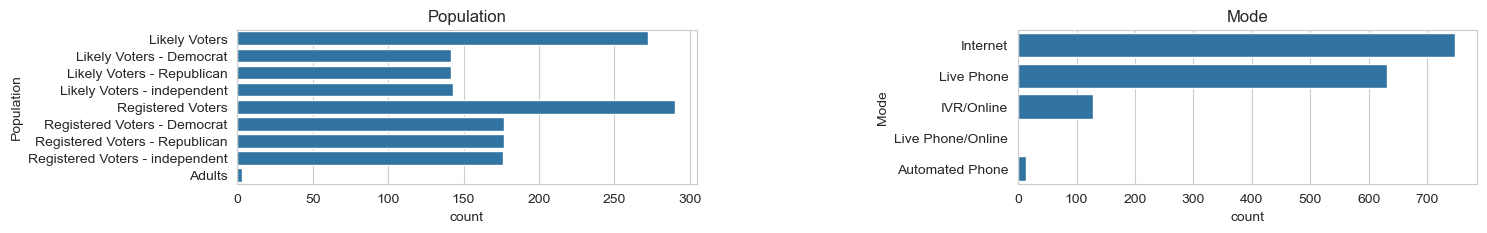

In [109]:
cols_1=["Population","Mode"]
plt.figure(figsize=(16,5))
count=1
for x in cols_1:
    plt.subplot(2,2,count)
    count+=1
    sns.countplot(df[x])    
    # Add title
    plt.title(f'{x}') 
    
# Adjust space between subplots
plt.subplots_adjust(wspace=0.7, hspace=0.5)  # Adjust as needed
plt.show()

* Largest Voter Group: Likely Voters - Independent
* Most Popular Survey Method: Internet
* Correlation Between Group Size and Survey Method: Larger groups might have been surveyed more frequently.

In [110]:
# Calculate mean support for Trump and Clinton
mean_support = df[['Trump', 'Clinton']].mean()
print("Mean Support:\n", mean_support)

Mean Support:
 Trump      40.643890
Clinton    42.733903
dtype: float64


<Axes: >

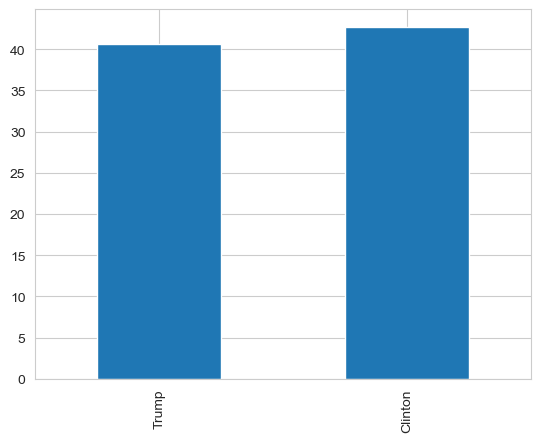

In [111]:
mean_support.plot.bar()

In [112]:
# Melt the DataFrame to long format for better analysis
df_melted = df.melt(id_vars=['Pollster', 'Start Date', 'End Date', 'Population', 'Mode',],
                    value_vars=["Trump", "Clinton", "Other", "Undecided"], 
                    var_name="Candidate", 
                    value_name="Support")

In [113]:
df_melted

,Pollster,Start Date,End Date,Population,Mode,Candidate,Support
0,Insights West,2016-11-04,2016-11-07,Likely Voters,Internet,Trump,41.0
1,Insights West,2016-11-04,2016-11-07,Likely Voters - Democrat,Internet,Trump,6.0
2,Insights West,2016-11-04,2016-11-07,Likely Voters - Republican,Internet,Trump,82.0
3,Insights West,2016-11-04,2016-11-07,Likely Voters - independent,Internet,Trump,38.0
4,IBD/TIPP,2016-11-04,2016-11-07,Likely Voters,Live Phone,Trump,43.0
...,...,...,...,...,...,...,...
6083,YouGov/Economist,2015-06-20,2015-06-22,Registered Voters - independent,Internet,Undecided,21.0
6084,Quinnipiac,2015-05-19,2015-05-26,Registered Voters,Live Phone,Undecided,14.0
6085,Quinnipiac,2015-05-19,2015-05-26,Registered Voters - Democrat,Live Phone,Undecided,5.0
6086,Quinnipiac,2015-05-19,2015-05-26,Registered Voters - Republican,Live Phone,Undecided,19.0


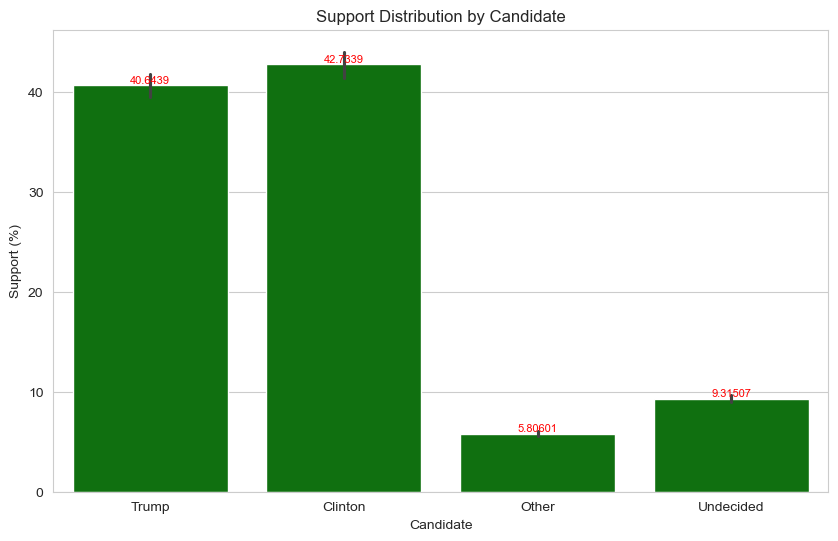

In [114]:
# Analysis 1: Support Distribution by Candidate
plt.figure(figsize=(10, 6))
plot=sns.barplot(x="Candidate", y="Support", data=df_melted,color='green')
for i in plot.containers:
    plot.bar_label(i,label_type='edge',fontsize=8,color='red')
plt.title('Support Distribution by Candidate')
#plt.savefig('Support Distribution by Candidate')
plt.ylabel('Support (%)')
plt.xlabel('Candidate')
plt.show()

* Clinton has the highest level of support, with approximately 42.73% of the votes.
* Trump has the second-highest level of support, with approximately 40.64% of the votes.
* Undecided has the lowest level of support, with approximately 9.32% of the votes.
* Other candidates have a support level of approximately 5.81%.
* Overall, the graph suggests a close race between Trump and Clinton, with Clinton holding a slight lead.
* The undecided category indicates that a significant portion of the electorate is still undecided or may support other candidates not represented in the graph.

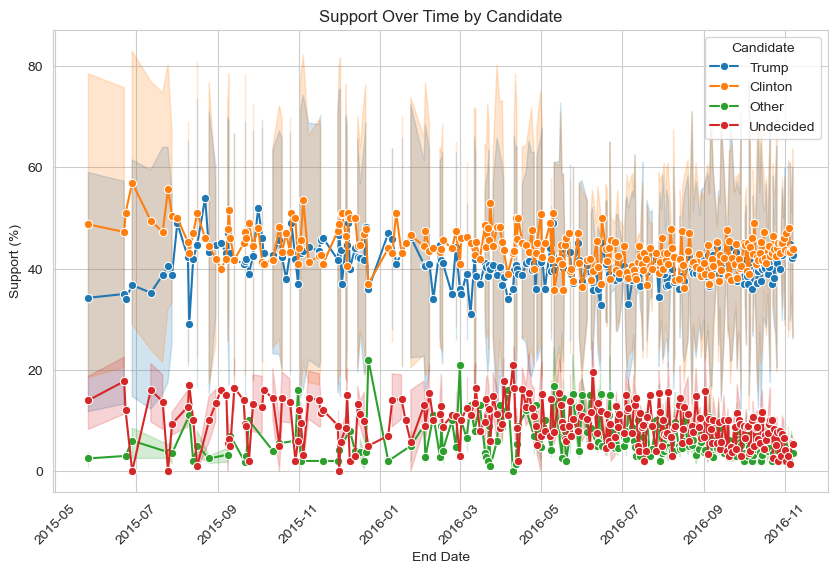

In [115]:
# Analysis 2: Support Over Time (if more dates were available)
plt.figure(figsize=(10, 6))
sns.lineplot(x="End Date", y="Support", hue="Candidate", data=df_melted, marker='o')
plt.title('Support Over Time by Candidate')
#plt.savefig('Support Over Time by Candidate')
plt.ylabel('Support (%)')
plt.xlabel('End Date')
plt.xticks(rotation=45)
plt.show()

* Trump and Clinton experienced fluctuations in support throughout the campaign. Trump's support generally increased from May 2015 until early 2016, then declined and subsequently increased again.
* Clinton's support was more volatile, with periods of increase and decline.
* Other candidates and Undecided showed relatively stable support levels throughout the campaign. The "Other" category experienced a slight increase in support towards the end of 2015, but then declined.
*  The "Undecided" category remained relatively consistent, with a slight increase in support towards the end of the campaign.
* Clinton consistently maintained a lead over Trump throughout the campaign, although the gap narrowed at times.
* The support for Other candidates and Undecided was significantly lower than that of Trump and Clinton, indicating a two-horse race between these two candidates.

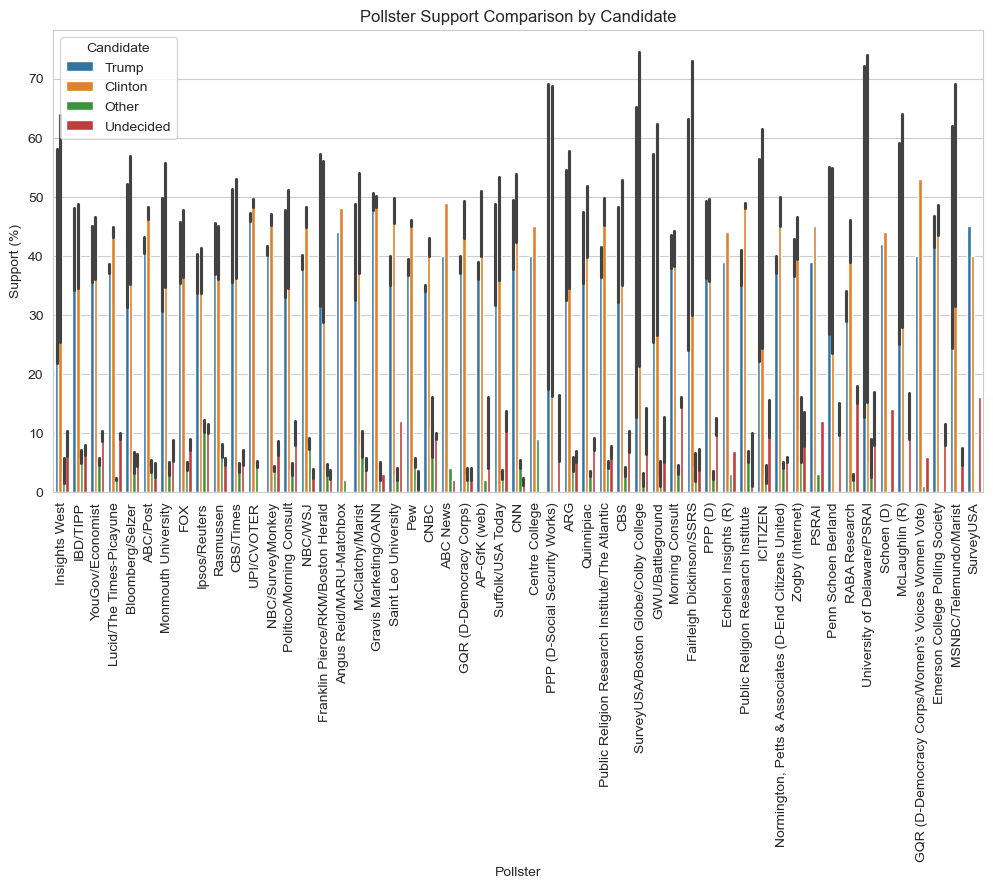

In [116]:
# Analysis 3: Pollster vs. Support for Each Candidate
plt.figure(figsize=(12, 6))
sns.barplot(x="Pollster", y="Support", hue="Candidate", data=df_melted)
plt.title('Pollster Support Comparison by Candidate')
#plt.savefig('Pollster Support Comparison by Candidate')
plt.ylabel('Support (%)')
plt.xlabel('Pollster')
plt.xticks(rotation=90)
plt.show()

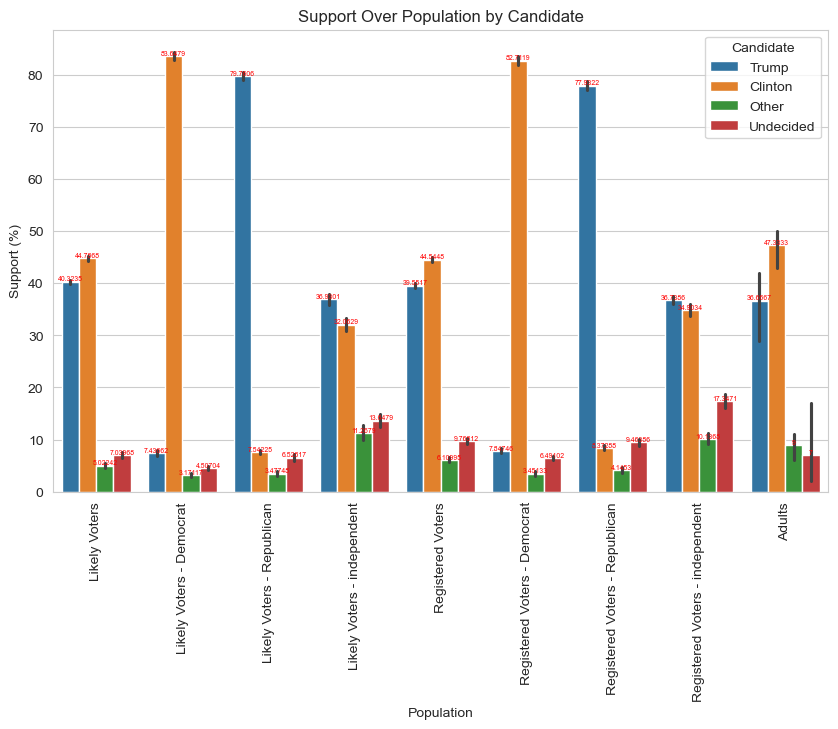

In [117]:
# Analysis 2: Support Over Population 
plt.figure(figsize=(10, 6))
plot=sns.barplot(x="Population", y="Support", hue="Candidate", data=df_melted)
for i in plot.containers:
    plot.bar_label(i,label_type='edge',fontsize=5,color='red')
plt.title('Support Over Population by Candidate')
#plt.savefig('Support Over Population by Candidate')
plt.ylabel('Support (%)')
plt.xlabel('Population')
plt.xticks(rotation=90)
plt.show()

* Trump generally receives the highest level of support across all population segments, with the exception of "Likely Voters" and "Democrats."
* Clinton has the highest support among "Likely Voters" and "Democrats," but her support is lower than Trump's in most other segments.
* Other candidates and Undecided have relatively low support levels across all population segments.
* There are variations in support levels within each population segment, indicating that factors other than population category may influence voting preferences.

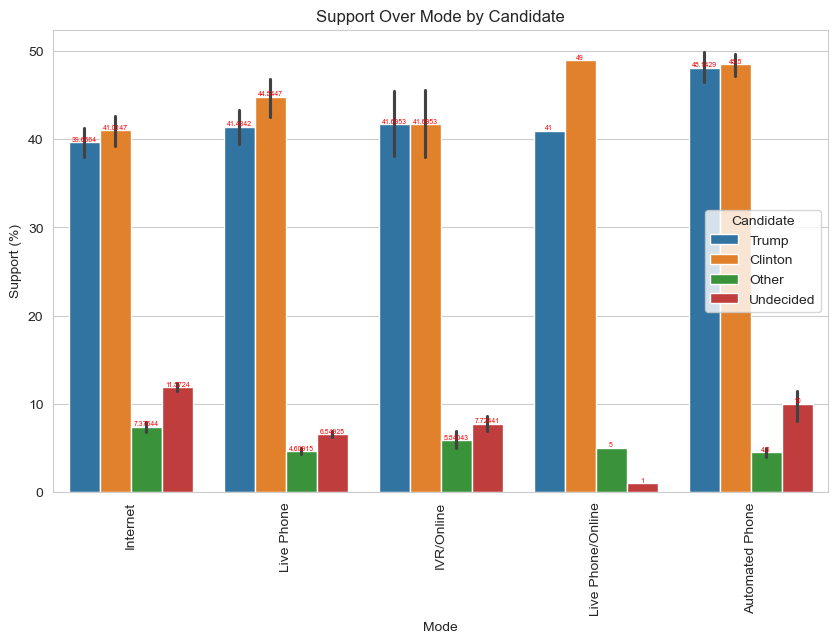

In [118]:
# Analysis 3: Support Over Mode 
plt.figure(figsize=(10, 6))
plot=sns.barplot(x="Mode", y="Support", hue="Candidate", data=df_melted)
for i in plot.containers:
    plot.bar_label(i,label_type='edge',fontsize=5,color='red')
plt.title('Support Over Mode by Candidate')
#plt.savefig('Support Over Mode by Candidate')
plt.ylabel('Support (%)')
plt.xlabel('Mode')
plt.xticks(rotation=90)
plt.show()

* Trump generally receives the highest level of support across all survey modes, with the exception of "VR/Online" where Clinton has slightly higher support.
* Clinton has the highest support among "VR/Online" respondents, but her support is lower than Trump's in most other modes.
* Other candidates and Undecided have relatively low support levels across all survey modes.

Population                       Mode        Candidate
Adults                           Internet    Clinton      43.000000
                                             Other        11.000000
                                             Trump        29.000000
                                             Undecided    17.000000
                                 Live Phone  Clinton      49.500000
                                                            ...    
Registered Voters - independent  Internet    Undecided    21.861702
                                 Live Phone  Clinton      38.439024
                                             Other         8.129870
                                             Trump        38.365854
                                             Undecided    11.763158
Name: Support, Length: 104, dtype: float64


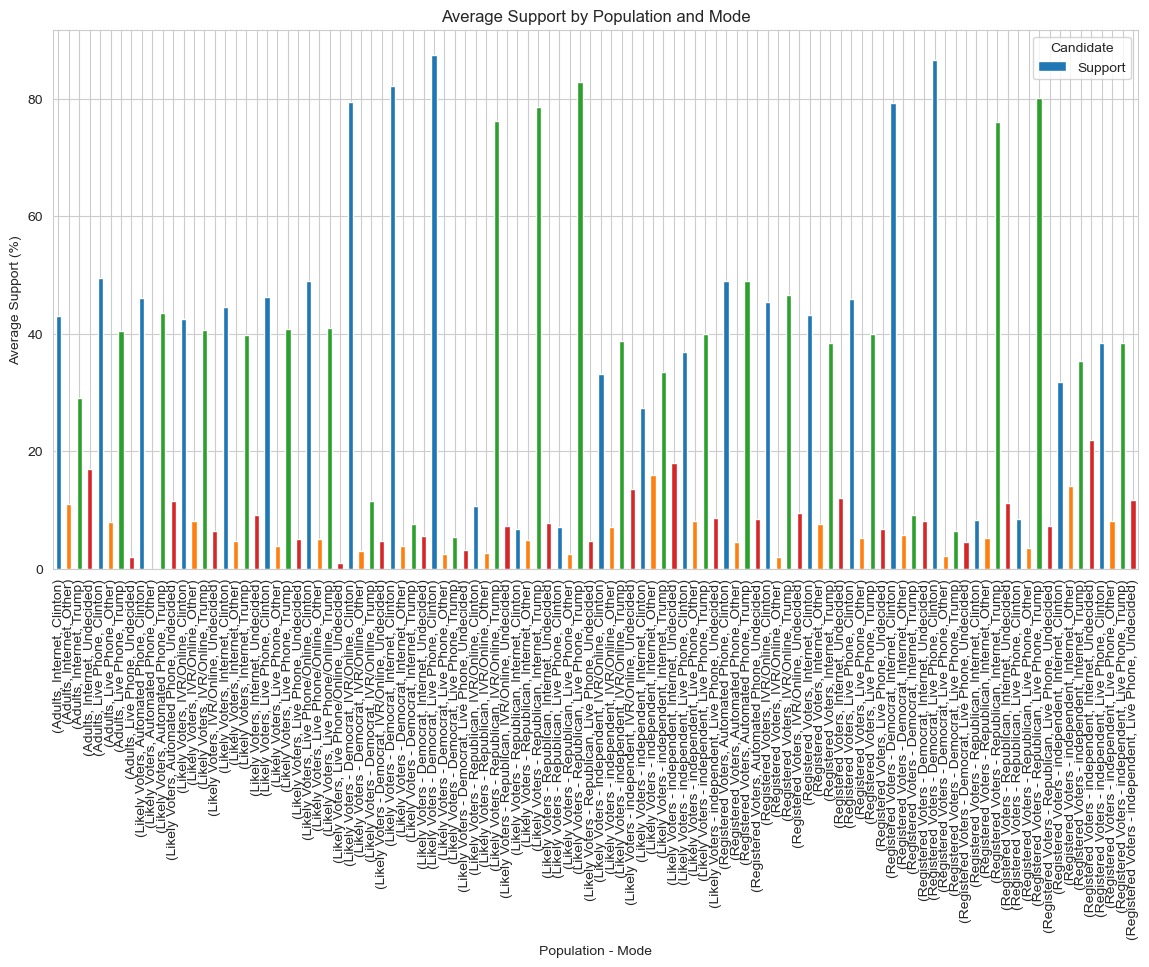

In [119]:
grouped = df_melted.groupby(['Population', 'Mode', 'Candidate'])['Support'].mean()

# Display the grouped data
print(grouped)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 

# Plotting using pandas' plot method
grouped.plot(kind='bar', figsize=(14, 7),color=colors)

# Customize the plot
plt.title('Average Support by Population and Mode')
#plt.savefig('Average Support by Population and Mode')
plt.ylabel('Average Support (%)')
plt.xlabel('Population - Mode')
plt.xticks(rotation=90)
plt.legend(title='Candidate')
plt.show()
